# End-to-end Multil-class e-commerce  Classification
* This notebook builds an end-to-end multi-class image classifierdeep learning based image classifier using TensorFlow(2.2.0) and keras.

## 1.Problem
* To classify whether images contain either a saree or a shirt or t-shirt.

## 2.Data
* The data we're using is from amazon website where scrap the images of saree,shirt and t-shirts.

* https://www.amazon.in/ref=nav_logo

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each Saree,shirt and t-shirt of each test image.

## 4.Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is saree,shirt or t-shirt (0 = saree,2=shirt,1=t-shirt)
* There are around 240 images in the training set.
* There are around 60 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import cv2
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import random



## Explore the Data


In [2]:
#lets define the paths labels(Sarees,shirts,Tshirts) of test ,train and augmented datasets
# Train
saree_dir_train = "./ama-clothes/train/Saree"
shirt_dir_train = "./ama-clothes/train/shirts"
t_shirt_dir_train = "./ama-clothes/train/Tshirts"

#Test
saree_dir_test = "./ama-clothes/test/Saree"
shirt_dir_test = "./ama-clothes/test/shirts"
t_shirt_dir_test = "./ama-clothes/test/Tshirts"

#Augmented
saree_dir_aug = "./ama-clothes/augmented/Saree"
shirt_dir_aug = "./ama-clothes/augmented/shirts"
t_shirt_dir_aug = "./ama-clothes/augmented/Tshirts"


In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', 'train' and 'augmented'
my_data_dir = './ama-clothes'
os.listdir(my_data_dir) 


['augmented', 'augmented.zip', 'test', 'train']

In [4]:
# Get filenames in list
Dir=['\\test\\','\\train\\','\\augmented\\']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+dir1
    p=os.listdir(path)
    print(i,p)



0 ['Saree', 'shirts', 'Tshirts']
1 ['Saree', 'shirts', 'Tshirts']
2 ['Saree', 'shirts', 'Tshirts']


### Lets see sample image


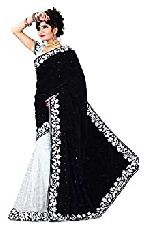

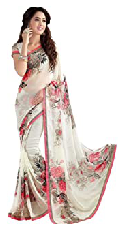

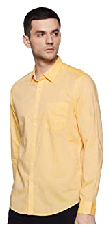

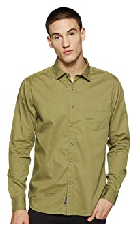

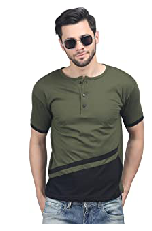

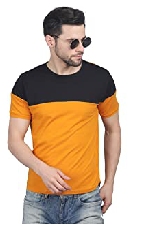

In [5]:
#lets see first two images of each  saree_dir_train, shirt_dir_train, t_shirt_dir_train dataset
import matplotlib.image as mpimg
Dir=[saree_dir_train, shirt_dir_train, t_shirt_dir_train]
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Lets do augmentation techniques needs to be performed on all the images in  training dataset 
* Rotation Range (-30,30)
* Brightness (Increasing the brightness of the images once)
* Brightness (Decreasing the brightness of the images once)
* Flipping the images
* Sharpening

## Data Augmentation using OpenCV on the scrapped images

* In this section I perform these augmentation techniques Rotation Range (-30,30),Brightness (Increasing the brightness of the images once),Brightness (Decreasing the brightness of the images once),Flipping the images Sharpening on train dataset labels directories and save the augmented images into augmented and train labels directories.

In [6]:

for dir in Dir:
    if dir==saree_dir_aug:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dir==t_shirt_dir_aug:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dir==shirt_dir_aug:
        print("\nPerforming Augmentation operations on Shirt images\n")
    for i in listdir(dir):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dir,i))
        input_image = cv2.resize(input_image, (150, 150), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        # checking first element of image name
        if fold[0]=="Shirt":
            # Save augmented Rotating images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            # Save augmented Rotating images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            # Save augmented Rotating images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_Rot.jpg'.format(i),rotated_image)
            # Save augmented Rotating images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            # Save augmented Horizontal Flipping images in augmented/shirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented rotated_image in train/shirt folder
            cv2.imwrite(shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            # Save augmented Horizontal Flipping images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            # Save augmented Horizontal Flipping images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_flip.jpg'.format(i),flip)
            # Save augmented Horizontal Flipping images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Increase images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            # Save augmented Brightness Increase images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_add.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Increase images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_add.jpg'.format(i),Added)
            # Save augmented Brightness Increase images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_add.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            # Save augmented Brightness Decrease images in augmented/shirts folder
            cv2.imwrite(shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/shirts folder
            cv2.imwrite(shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            # Save augmented Brightness Decrease images in augmented/Saree folder
            cv2.imwrite(saree_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Saree folder
            cv2.imwrite(saree_dir_train+'/{}_sub.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            # Save augmented Brightness Decrease images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sub.jpg'.format(i),Subtract)
            # Save augmented Brightness Decrease images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sub.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(saree_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(saree_dir_train+'/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            # Save augmented Sharpening images in augmented/Tshirt folder
            cv2.imwrite(t_shirt_dir_aug+'/{}_sharp.jpg'.format(i),sharpened)
            # Save augmented Sharpening images in train/Tshirt folder
            cv2.imwrite(t_shirt_dir_train+'/{}_sharp.jpg'.format(i),sharpened)    

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Saree_img_120.jpeg
Shape

Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_148.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_149.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_15.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_150.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_152.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_155.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_156.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_157.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_159.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_16.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_17.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_18.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Shirt_img_19.jpeg
Shape of the image is:  (150, 150, 3)
Input

Input Image is:  Tshirt_img_24.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_25.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_26.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_27.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_28.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_29.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_30.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_32.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_35.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_37.jpeg
Shape of the image is:  (150, 150, 3)
Input Image is:  Tshirt_img_39.jpeg
Shape of the image is:  (150, 150, 3)


##  Training our model


In [7]:
input_shape=(150,150,3)
img_width=150
img_height=150

batch_size=12
epoch=100

train_data_dir='./ama-clothes/train'
validation_data_dir='./ama-clothes/test'

nb_train_samples=480
nb_validation_samples=20

model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer = RMSprop(lr = 0.001),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0

## Data Preprocessing


In [8]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=Data_gen.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 60 images belonging to 3 classes.
Found 1440 images belonging to 3 classes.


## checking image after applying data augmentation technique


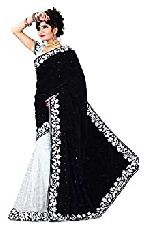

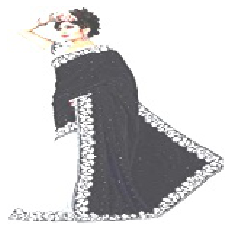

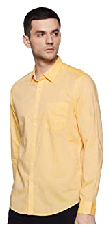

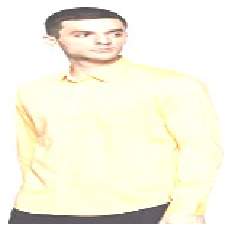

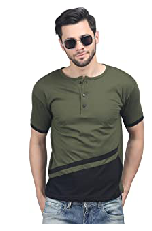

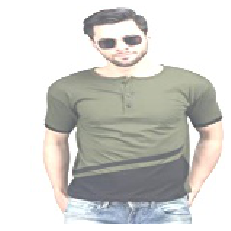

In [9]:
import matplotlib.image as mpimg

for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [10]:
# checking class indices
train_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

## EarlyStopping and ModelCheckpoint

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('clothes.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Training

In [12]:
history = model.fit_generator(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 1.1770 - accuracy: 0.4500
Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to clothes.h5
40/40 [==============================] - 9s 214ms/step - loss: 1.1770 - accuracy: 0.4500 - val_loss: 0.6645 - val_accuracy: 0.7500
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.5896
Epoch 00002: val_accuracy improved from 0.75000 to 1.00000, saving model to clothes.h5
40/40 [==============================] - 8s 211ms/step - loss: 0.9099 - accuracy: 0.5896 - val_loss: 0.3508 - val_accuracy: 1.0000
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.7682 - accuracy: 0.6187
Epoch 00003: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 210ms/step - loss: 0.7682 - accuracy: 0.6187 - val_loss: 0.2742 - val_accuracy: 1.0000
Epoch 4/100
40/40 [=

Epoch 29/100
40/40 [==============================] - ETA: 0s - loss: 0.2632 - accuracy: 0.9062
Epoch 00029: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 189ms/step - loss: 0.2632 - accuracy: 0.9062 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 30/100
40/40 [==============================] - ETA: 0s - loss: 0.2224 - accuracy: 0.9083
Epoch 00030: val_accuracy did not improve from 1.00000
40/40 [==============================] - 9s 216ms/step - loss: 0.2224 - accuracy: 0.9083 - val_loss: 2.1954e-05 - val_accuracy: 1.0000
Epoch 31/100
40/40 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.9146
Epoch 00031: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 200ms/step - loss: 0.2741 - accuracy: 0.9146 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 32/100
40/40 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9104
Epoch 00032: val_accuracy did not improve from 1.00000

Epoch 58/100
40/40 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9479
Epoch 00058: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 200ms/step - loss: 0.1483 - accuracy: 0.9479 - val_loss: 2.9802e-08 - val_accuracy: 1.0000
Epoch 59/100
40/40 [==============================] - ETA: 0s - loss: 0.1689 - accuracy: 0.9458
Epoch 00059: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 203ms/step - loss: 0.1689 - accuracy: 0.9458 - val_loss: 4.3696e-05 - val_accuracy: 1.0000
Epoch 60/100
40/40 [==============================] - ETA: 0s - loss: 0.1284 - accuracy: 0.9563
Epoch 00060: val_accuracy did not improve from 1.00000
40/40 [==============================] - 8s 209ms/step - loss: 0.1284 - accuracy: 0.9563 - val_loss: 1.5660e-04 - val_accuracy: 1.0000
Epoch 61/100
40/40 [==============================] - ETA: 0s - loss: 0.1150 - accuracy: 0.9542
Epoch 00061: val_accuracy did not improve from

Epoch 87/100
40/40 [==============================] - ETA: 0s - loss: 0.0960 - accuracy: 0.9688
Epoch 00087: val_accuracy did not improve from 1.00000
40/40 [==============================] - 14s 344ms/step - loss: 0.0960 - accuracy: 0.9688 - val_loss: 7.9168e-04 - val_accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - ETA: 0s - loss: 0.1182 - accuracy: 0.9646
Epoch 00088: val_accuracy did not improve from 1.00000
40/40 [==============================] - 13s 331ms/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 1.0629e-06 - val_accuracy: 1.0000
Epoch 00088: early stopping


In [13]:
#Save our model
model.save('clothes.h5')

In [14]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.177048,0.450000,6.644630e-01,0.75
1,0.909904,0.589583,3.507860e-01,1.00
2,0.768175,0.618750,2.742099e-01,1.00
3,0.716036,0.645833,3.721488e-01,1.00
4,0.670470,0.672917,6.635222e-01,1.00
...,...,...,...,...
83,0.120032,0.964583,7.053195e-07,1.00
84,0.100219,0.952083,1.147334e-05,1.00
85,0.258380,0.929167,1.353698e-04,1.00
86,0.095998,0.968750,7.916756e-04,1.00


## Plotting our model Accuracy and Loss


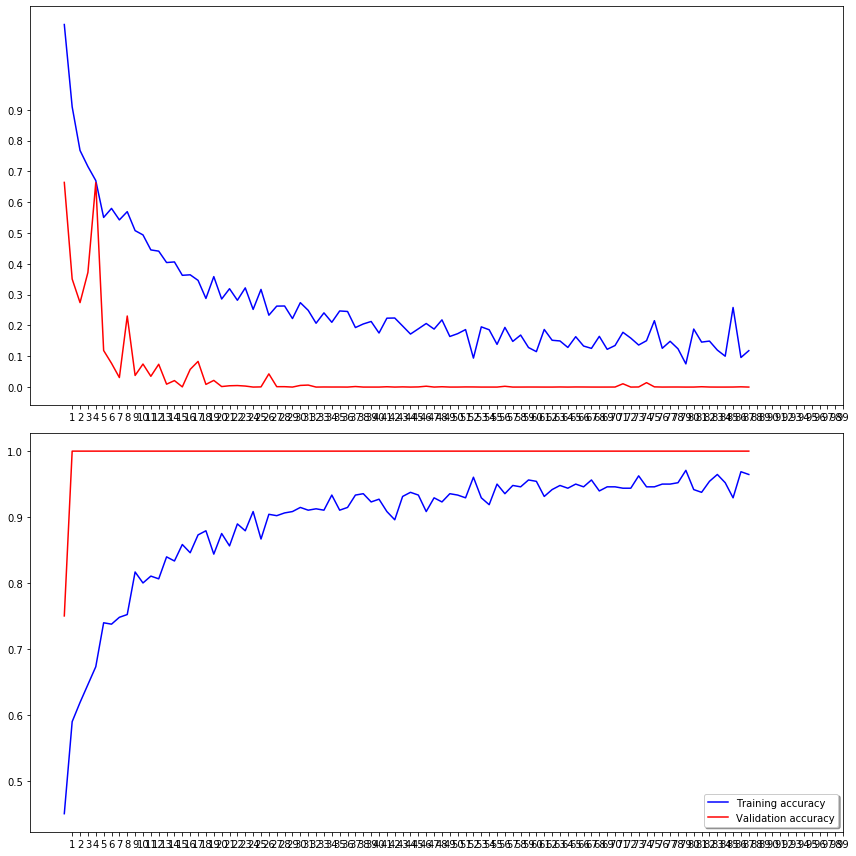

In [15]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [16]:
#lets evaluate our model
model.evaluate(validation_generator)

5/5 [==============================] - 0s 73ms/step - loss: 0.5902 - accuracy: 0.8500


[0.5902336835861206, 0.8500000238418579]

In [17]:
# As we can see that there are 3 classes for the 60 test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Predicting the Test images


In [18]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res.head(50)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 0
 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2]


,ImageId,Predicted_Label,Actual_Label
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


In [19]:
#Lets load our model
from keras.models import load_model

saved_model = load_model('clothes.h5')

### Testing our  classifier using openCV

Input Image is: Saree_img_231.jpeg


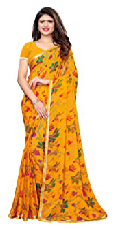

ValueError: in user code:

    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\devanshu suri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 3136 but received input with shape [None, 2304]


In [20]:

test_dire=[saree_dir_test,shirt_dir_test,t_shirt_dir_test]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")